In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle #TEST

In [2]:
df_iso_actual = pd.read_csv("../raw_data/CAISOactualLoad.csv") #TEST

In [3]:
#TEST start
global zoneCheck_ref
zoneCheck_ref = 'CA ISO'
df_iso_actual = df_iso_actual.loc[df_iso_actual['zone'] == zoneCheck_ref]

global zoneCheck
zoneCheck = df_iso_actual['zone'].iloc[0]
#TEST end

df_iso_actual

,Date,load,zone
1,1/1/2018 12:00:00 AM,21202.0,CA ISO
12,1/1/2018 1:00:00 AM,20559.0,CA ISO
23,1/1/2018 2:00:00 AM,20017.0,CA ISO
34,1/1/2018 3:00:00 AM,19629.0,CA ISO
45,1/1/2018 4:00:00 AM,19613.0,CA ISO
...,...,...,...
390213,12/31/2020 7:00:00 PM,25789.0,CA ISO
390230,12/31/2020 8:00:00 PM,24974.0,CA ISO
390247,12/31/2020 9:00:00 PM,24128.0,CA ISO
390264,12/31/2020 10:00:00 PM,23102.0,CA ISO


In [4]:
df_iso_actual['Date']

1           1/1/2018 12:00:00 AM
12           1/1/2018 1:00:00 AM
23           1/1/2018 2:00:00 AM
34           1/1/2018 3:00:00 AM
45           1/1/2018 4:00:00 AM
                   ...          
390213     12/31/2020 7:00:00 PM
390230     12/31/2020 8:00:00 PM
390247     12/31/2020 9:00:00 PM
390264    12/31/2020 10:00:00 PM
390281    12/31/2020 11:00:00 PM
Name: Date, Length: 26285, dtype: object

In [5]:
date_and_time = df_iso_actual['Date'].to_list()
date = [d.split(' ') for d in date_and_time]
date

[['1/1/2018', '12:00:00', 'AM'],
 ['1/1/2018', '1:00:00', 'AM'],
 ['1/1/2018', '2:00:00', 'AM'],
 ['1/1/2018', '3:00:00', 'AM'],
 ['1/1/2018', '4:00:00', 'AM'],
 ['1/1/2018', '5:00:00', 'AM'],
 ['1/1/2018', '6:00:00', 'AM'],
 ['1/1/2018', '7:00:00', 'AM'],
 ['1/1/2018', '8:00:00', 'AM'],
 ['1/1/2018', '9:00:00', 'AM'],
 ['1/1/2018', '10:00:00', 'AM'],
 ['1/1/2018', '11:00:00', 'AM'],
 ['1/1/2018', '12:00:00', 'PM'],
 ['1/1/2018', '1:00:00', 'PM'],
 ['1/1/2018', '2:00:00', 'PM'],
 ['1/1/2018', '3:00:00', 'PM'],
 ['1/1/2018', '4:00:00', 'PM'],
 ['1/1/2018', '5:00:00', 'PM'],
 ['1/1/2018', '6:00:00', 'PM'],
 ['1/1/2018', '7:00:00', 'PM'],
 ['1/1/2018', '8:00:00', 'PM'],
 ['1/1/2018', '9:00:00', 'PM'],
 ['1/1/2018', '10:00:00', 'PM'],
 ['1/1/2018', '11:00:00', 'PM'],
 ['1/2/2018', '12:00:00', 'AM'],
 ['1/2/2018', '1:00:00', 'AM'],
 ['1/2/2018', '2:00:00', 'AM'],
 ['1/2/2018', '3:00:00', 'AM'],
 ['1/2/2018', '4:00:00', 'AM'],
 ['1/2/2018', '5:00:00', 'AM'],
 ['1/2/2018', '6:00:00', 'AM'],
 

In [6]:
date_and_time = df_iso_actual['Date'].to_list()
date = [d.split(' ') for d in date_and_time]
year = [d[0].split('/')[2] for d in date]
month_year = [d[0].split('/')[0]+'/'+d[0].split('/')[2] for d in date]
df_iso_actual['Year'] = year
df_iso_actual['Month_Year'] = month_year

In [7]:
df_iso_actual

,Date,load,zone,Year,Month_Year
1,1/1/2018 12:00:00 AM,21202.0,CA ISO,2018,1/2018
12,1/1/2018 1:00:00 AM,20559.0,CA ISO,2018,1/2018
23,1/1/2018 2:00:00 AM,20017.0,CA ISO,2018,1/2018
34,1/1/2018 3:00:00 AM,19629.0,CA ISO,2018,1/2018
45,1/1/2018 4:00:00 AM,19613.0,CA ISO,2018,1/2018
...,...,...,...,...,...
390213,12/31/2020 7:00:00 PM,25789.0,CA ISO,2020,12/2020
390230,12/31/2020 8:00:00 PM,24974.0,CA ISO,2020,12/2020
390247,12/31/2020 9:00:00 PM,24128.0,CA ISO,2020,12/2020
390264,12/31/2020 10:00:00 PM,23102.0,CA ISO,2020,12/2020


In [8]:
#TEST start
global yearCheck_ref
yearCheck_ref = '2018'
df_year_load = df_iso_actual.loc[df_iso_actual['Year'] == yearCheck_ref][['Month_Year', 'load']].copy()

global yearCheck
yearCheck = df_iso_actual.loc[df_iso_actual['Year'] == yearCheck_ref][['Year']].copy()['Year'].iloc[0]
#TEST end

In [9]:
df_year_load

,Month_Year,load
1,1/2018,21202.0
12,1/2018,20559.0
23,1/2018,20017.0
34,1/2018,19629.0
45,1/2018,19613.0
...,...,...
116084,12/2018,26814.0
116098,12/2018,25905.0
116112,12/2018,24935.0
116126,12/2018,23804.0


<Figure size 432x288 with 0 Axes>

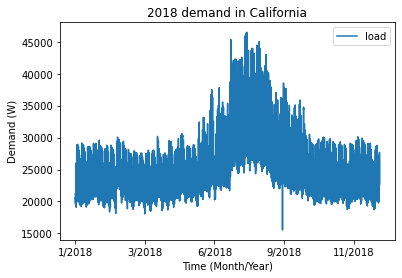

In [10]:
plt.figure()
# plt.plot(df_year_load['Date'].tolist(), df_year_load['load'].tolist())
df_year_load.plot(x='Month_Year', y='load')
plt.xlabel('Time (Month/Year)')
plt.ylabel('Demand (W)')
plt.title('2018 demand in California')
plt.savefig('2018_demand_in_California.jpg')
#TEST start
global demandTemporal
demandTemporal = 1
#TEST end

In [11]:
#TEST start
with open('demandVars.pkl', 'wb') as f:
    pickle.dump([zoneCheck_ref, zoneCheck, yearCheck_ref, yearCheck, demandTemporal], f)
#TEST end